In [1]:
import numpy as np
import scipy.optimize as so
import matplotlib.pyplot as plt
plt.clf()
plt.close('all')
plt.style.use('classic')

Simulation has been carried out using the scheme detailed in cmos.asc. In particular using $V_{DS} = 10 \textrm{ }\mathrm{mV}$.

### Method 1: Constant current method

In [2]:
# constant current method
fileName = "/Users/javi/Documents/Padova/2/AppliedElectronics/digitalDesign/1/nmos.txt"

f = open(fileName, 'r').read()
data = f.split('\n')

Vg = []
Ids = []
for j in range(1, len(data)-1):
    pair = data[j].split('\t')
    Vg.append(float(pair[0]))
    Ids.append(float(pair[1]))
Vg = np.array(Vg, "double")
Ids = np.array(Ids, "double")

Text(0.5955000000000004, 0.6000005555555555, '$\\ V_{th}\\approx 0.55\\, \\mathrm{V}$')

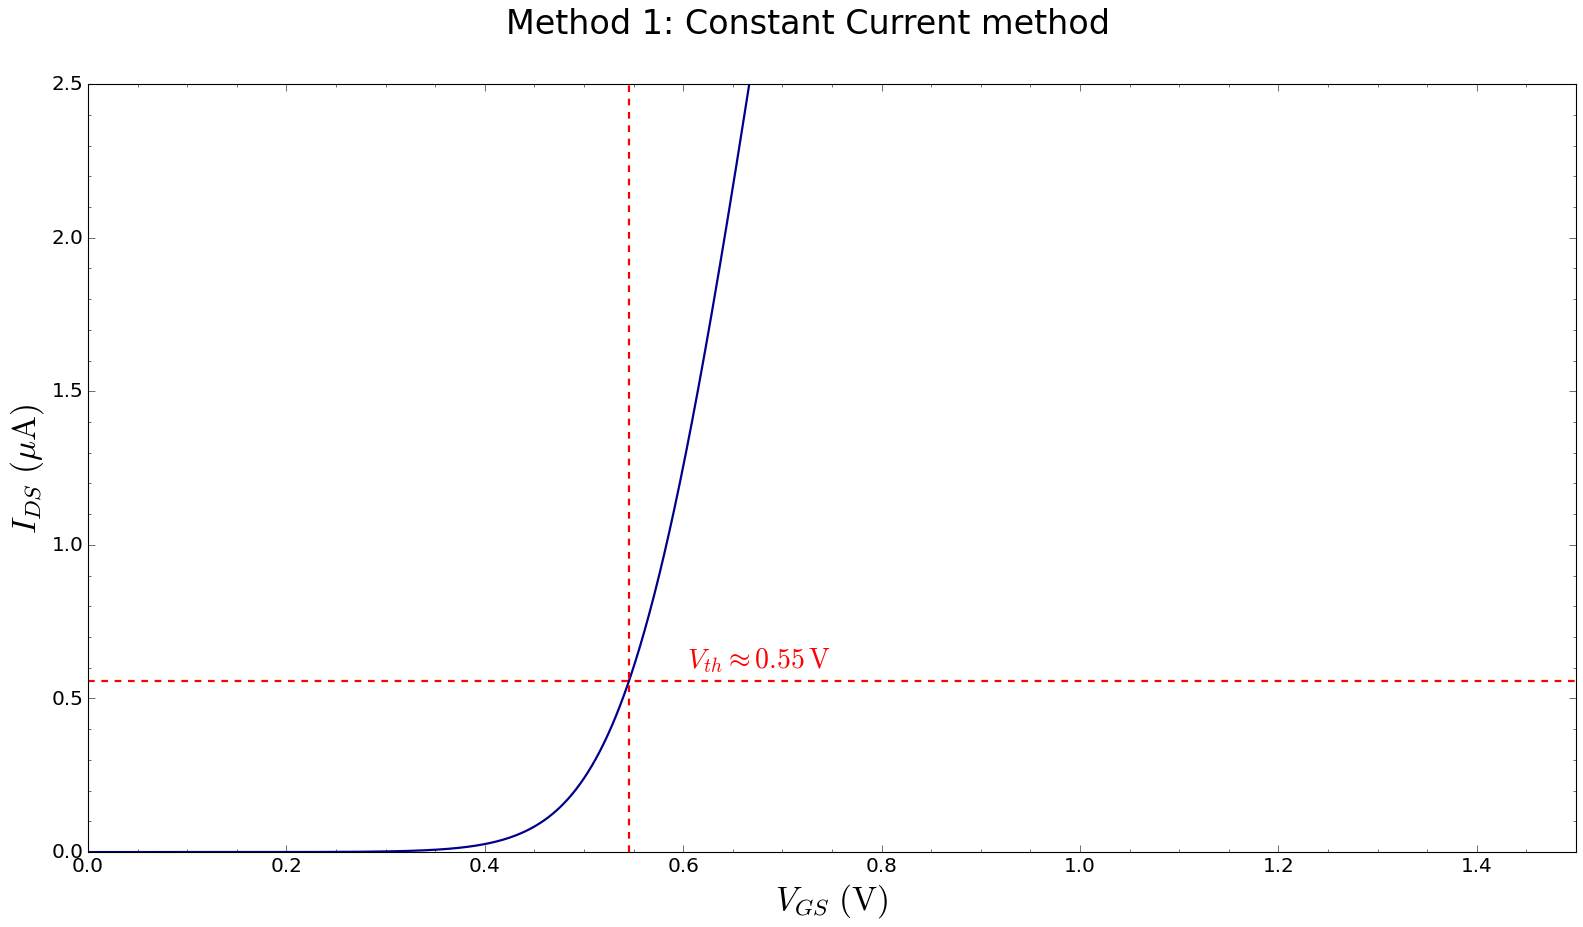

In [4]:
fig, ax = plt.subplots(); fig.patch.set_facecolor('xkcd:white')
plt.rcParams['figure.figsize'] = [24, 12]
ax.tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
ax.minorticks_on()
ax.tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
ax.tick_params(axis = 'both', labelsize = 18)
ax.set_ylim(0, 2.5)
ax.set_xlim(0, 1.5)

plt.suptitle("Method 1: Constant Current method", fontsize = 30)
ax.plot(Vg, Ids*1e6, label = '$I_{{\\rm ds}}$', color = 'darkblue', linestyle = 'solid', linewidth = 2.)
ax.set_xlabel('$V_{GS}\ (\\mathrm{V})$', fontsize = 30)
ax.set_ylabel('$I_{DS}\ (\\mathrm{\mu A})$', fontsize = 30)

I_DS_tosearch = 1 / 0.18 * 1e-7
V_threshold = Vg[np.isclose(I_DS_tosearch, Ids, rtol = 1e-20)]

ax.axhline(y = I_DS_tosearch * 1e6, xmin = 0, xmax = 1, linestyle = "dashed", color = "red", linewidth = 2.)
ax.axvline(x = np.mean(V_threshold), ymin = 0, ymax = 1, linestyle = "dashed", color = "red", linewidth = 2.)
ax.text(np.mean(V_threshold) + .05, I_DS_tosearch + 0.6, '$\ V_{th}\\approx %.2f\, \mathrm{V}$' % np.mean(V_threshold), color = 'red', fontsize = 25)

In [10]:
print("The threshold voltage is (approximately): %.3f V" % np.mean(V_threshold))

The threshold voltage is (approximately): 0.546 V


### Method 2: Extrapolation in the Linear Region method

Text(0, 0.5, '$I_{DS}\\ (\\mathrm{\\mu A})$')

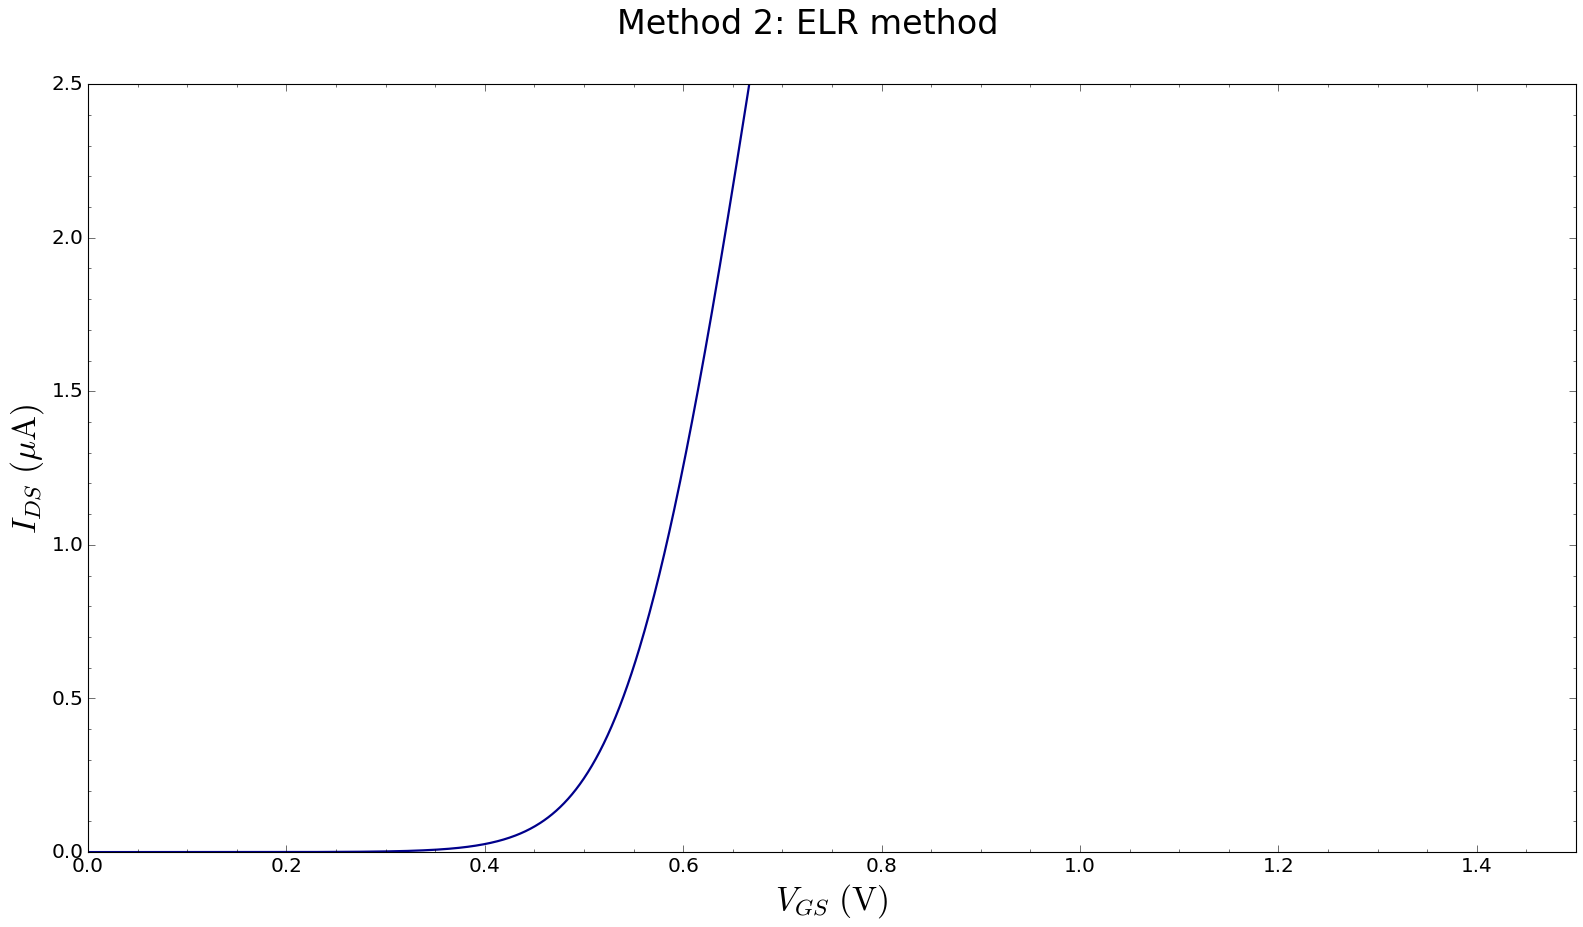

In [11]:
fig, ax = plt.subplots(); fig.patch.set_facecolor('xkcd:white')
plt.rcParams['figure.figsize'] = [24, 12]
ax.tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
ax.minorticks_on()
ax.tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
ax.tick_params(axis = 'both', labelsize = 18)
ax.set_ylim(0, 2.5)
ax.set_xlim(0, 1.5)

plt.suptitle("Method 2: ELR method", fontsize = 30)
ax.plot(Vg, Ids*1e6, label = '$I_{{\\rm ds}}$', color = 'darkblue', linestyle = 'solid', linewidth = 2.)
ax.set_xlabel('$V_{GS}\ (\\mathrm{V})$', fontsize = 30)
ax.set_ylabel('$I_{DS}\ (\\mathrm{\mu A})$', fontsize = 30)

Now we will find the threshold voltage as the intersect of the maximum derivative with the horizontal axis, plus adding $V_{DS}/2$.

Text(0.5628784285714311, 0.1, '$\\ V_{th}\\approx 0.55\\, \\mathrm{V}$')

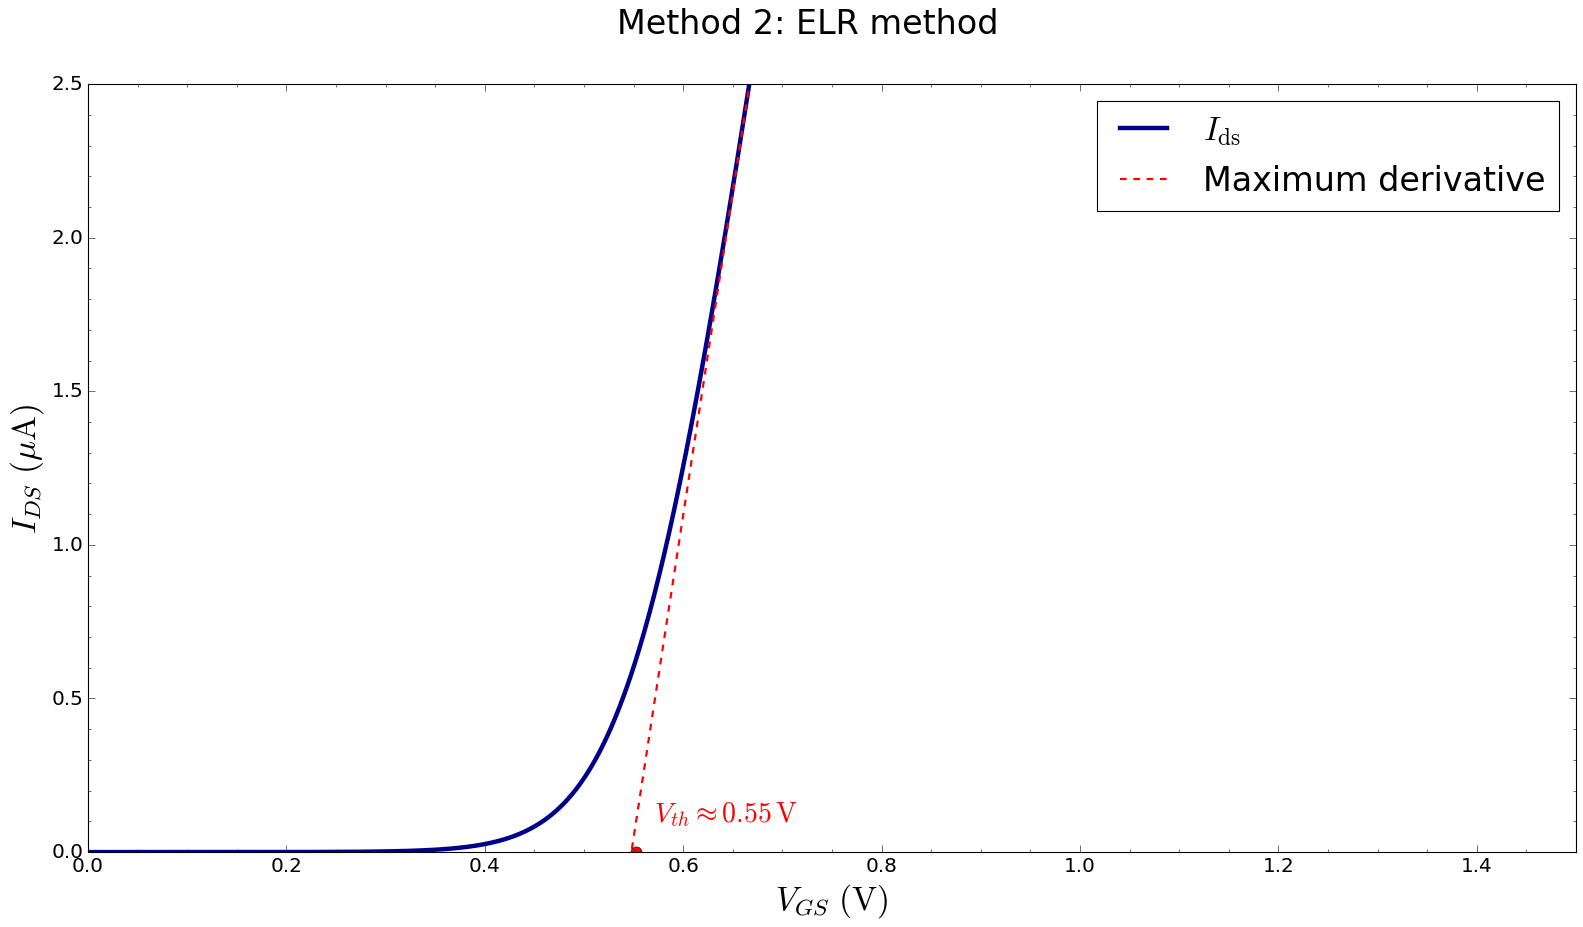

In [12]:
fig, ax = plt.subplots(); fig.patch.set_facecolor('xkcd:white')
plt.rcParams['figure.figsize'] = [24, 12]
ax.tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
ax.minorticks_on()
ax.tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
ax.tick_params(axis = 'both', labelsize = 18)
ax.set_ylim(0, 2.5)
ax.set_xlim(0, 1.5)

plt.suptitle("Method 2: ELR method", fontsize = 30)
ax.plot(Vg, Ids*1e6, label = '$I_{{\\rm ds}}$', color = 'darkblue', linestyle = 'solid', linewidth = 4.)
ax.set_xlabel('$V_{GS}\ (\\mathrm{V})$', fontsize = 30)
ax.set_ylabel('$I_{DS}\ (\\mathrm{\mu A})$', fontsize = 30)

# find the maximum derivative
diff = []
for i in range(1, len(Vg)):
    diff.append(Ids[i]-Ids[i-1])
Vg[np.argmax(diff)]
slope = 1e6 * (Ids[np.argmax(diff)] - Ids[np.argmax(diff)-1]) / (Vg[np.argmax(diff)] - Vg[np.argmax(diff)-1])
inter = Ids[np.argmax(diff)]*1e6 - slope * Vg[np.argmax(diff)]
xplot = np.linspace(0, .7, 2)
def lin(x, a, b):
    return a + b*x
yplot = lin(xplot, inter, slope)

ax.plot(xplot, yplot, "r--", linewidth = 2, label = "Maximum derivative")
ax.legend(loc= "best", fontsize = 30)
V_th = (-inter / slope) + 0.01/2.
ax.plot(V_th, 0, "ro", markersize = 10)
ax.text(V_th + .01, 0.1, '$\ V_{th}\\approx %.2f\, \mathrm{V}$' % V_th, color = 'red', fontsize = 25)

In [13]:
print("The threshold voltage is (approximately): %.3f V" % V_th)

The threshold voltage is (approximately): 0.553 V
